## Numpy

In [2]:
import numpy as np

### Типы данных в numpy

**Целочисленные**: int8, int16, int32, int64 \
**Беззнаковые целочисленные типы данных**: uint8, uint16, uint32, uint64 \
**Типы данных с плавающей точкой**: float16, float32, float64 (по умолчанию), float128 \
**Булево**: bool_ \
**Строковый**: str_ 

In [3]:
a = np.int8(25) # объявление переменной нужного типа
a

25

In [5]:
np.iinfo(np.int8) # описание типа данных

iinfo(min=-128, max=127, dtype=int8)

In [6]:
np.iinfo(a) # описание типа данных

iinfo(min=-128, max=127, dtype=int8)

### Массивы

**Массив** — это структура данных, в которой:

* Элементы хранятся в указанном порядке.
* Каждый элемент можно получить по индексу за одинаковое время.
* Все элементы приведены к одному и тому же типу данных.
* Максимальное число элементов и объём выделенной памяти заданы заранее.

**Размерность массива** - число индексов, которое необходимо для однозначного получения элемента из массива \
**Форма (структура) массива** — протяжённость массива по каждой из размерностей

In [9]:
arr = np.array([    # создание массива
               [12, 45, 78],
               [34, 56, 13],
               [12, 98, 76]
               ], dtype=np.int8) 
arr = np.int16(arr) # изменение типа элементов в массиве
print('Размерность:', arr.ndim) 
print('Число элементов:', arr.size) 
print('Форма:', arr.shape) 
print('вес элемента в байтах:', arr.itemsize) 

Размерность: 2
Число элементов: 9
Форма: (3, 3)
вес элемента в байтах: 2


### Заполнение массивов

Методы: 
* **np.zeros**(shape, dtype=None) - нулевой массив; 
* **np.arange**([start,] stop, [step,], dtype=None) - аналог range для массивов; 
* **np.linspace**(start, stop, num=50, endpoint=True, retstep=False, dtype=None) - массив из чисел, расположенных на равном удалении друг от друга между началом и концом диапазона, где 
    + num - кол-во элементов в диапазоне; 
    + endpoint — включён или исключён конец диапазона (по умолчанию включён); 
    + retstep (по умолчанию False) - возвращать ли использованный шаг между значениями, помимо самого массива; 

In [10]:
zeros_2d = np.zeros((2, 2), dtype=np.float16) # нулевой массив
zeros_2d

array([[0., 0.],
       [0., 0.]], dtype=float16)

In [11]:
# Массив чисел от 2.5 до 5 (не включительно) с шагом 0.5 и типом float16
arr = np.arange(2.5, 5, 0.5, dtype=np.float16) 
arr

array([2.5, 3. , 3.5, 4. , 4.5], dtype=float16)

In [13]:
arr, step = np.linspace(1, 2, 10, endpoint=False, retstep=True)
print('Массив:', arr)
print('Шаг:', step)

Массив: [1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8 1.9]
Шаг: 0.1


### Действия с массивами

#### Изменение массивов

In [14]:
arr = np.arange(8)
arr.shape = (2, 4) # изменение формы массива
arr

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

In [16]:
arr = np.arange(8)
# создание нового массива нужной формы из исходного с заполнением по столбцам (по умолчанию по строкам)
arr_new = arr.reshape((2, 4), order='F') 
arr_new

array([[0, 2, 4, 6],
       [1, 3, 5, 7]])

In [17]:
arr = np.array([[0, 1, 2, 3], [4, 5, 6, 7]])
print(arr)
arr_new = arr.transpose() # транспонирование массива
print(arr_new)

[[0 1 2 3]
 [4 5 6 7]]
[[0 4]
 [1 5]
 [2 6]
 [3 7]]


#### Артифметические операции с массивами

* **np.min(arr)** - минимальное значение (= arr.min())
* **np.max(arr)** - максимальное значение 
* **np.mean(arr)** - среднее значение 
* **np.sum(arr)** - сумма элементов массива
* **np.sqrt(arr)** - квадратный корень из элементов массива  


#### Индексы и срезы в массивах

In [19]:
arr = np.array([0, 1, 2, 3])
print(arr)
print(arr[::-1]) # вывод в обратном порядке

[0 1 2 3]
[3 2 1 0]


In [27]:
arr = np.array([[0, 1, 2, 3],
       [4, 5, 6, 7],
       [8, 9, 10, 11]])
arr[::, 1::2] # все строки, стобцы со 2-го через один

array([[ 1,  3],
       [ 5,  7],
       [ 9, 11]])

In [28]:
# Элемент в последней строке, последней колонке
# Записи идентичны
print(arr[-1][-1])
print(arr[-1, -1])

11
11


#### Сортировка одномерных массивов

* **np.sort(arr)** - создание нового отсортированного массива
* **arr.sort()** - сортировка исходного массива

#### Работа с пропущенными данными

In [29]:
data = np.array([4, 9, -4, 3])
roots = np.sqrt(data)
roots # третий элемент nan, т.к. нельзя извлечь корень из 4

C:\Users\lm137\AppData\Local\Temp\ipykernel_10664\502892121.py:2: RuntimeWarning: invalid value encountered in sqrt
  roots = np.sqrt(data)


array([2.        , 3.        ,        nan, 1.73205081])

In [30]:
np.isnan(roots) # массив с признаками, какие элементы nan

array([False, False,  True, False])

In [31]:
roots[np.isnan(roots)] = 0 # присваиваем 0 элементам с nan
roots

array([2.        , 3.        , 0.        , 1.73205081])

### Операции с векторами

**Вектор** — одномерный массив

* **vec1 +(-,*,/) vec2** - поэлементное сложение (вычитание, произведение, частное)

**Длина вектора** (расстояние между началом и концом) - квадратный корень из суммы квадратов всех его координат:

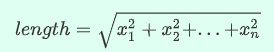

**Расстояние между 2-мя векторами** (расстояние между их концами) - квадратный корень из суммы квадратов разностей соответствующих координат:

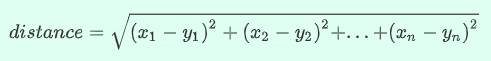

**Скалярное произведение 2-х векторов** - сумма произведений их соответствующих координат. Скаляр = число, т.е. результат - 1 число:

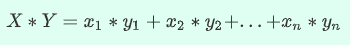

Если скалярное произведение = 0, значит векторы перпендикулярны.
Скалярное произведение часто используется для определения угла между векторами

**Коллинеарные векторы** — это ненулевые векторы, лежащие на одной прямой или на параллельных прямых. 

**Сонаправленные векторы** - коллинеарные векторы, у которых совпадает направление. 
Сумма длин сонаправленных векторов должна быть равной длине суммы двух векторов


In [33]:
vec1 = np.array([0, 3, 5])
vec2 = np.array([12, 4, 7])
print('Длина 1-го вектора:', np.linalg.norm(vec1))
print('Расстояние между векторами:', np.linalg.norm(vec1 - vec2))
print('Скалярное произведение векторов:', np.dot(vec1, vec2))

Длина 1-го вектора: 5.830951894845301
Расстояние между векторами: 12.206555615733702
Скалярное произведение векторов: 47


### Случайные числа в Numpy

#### Генерация случайных чисел

**Псевдослучайные числа** — это последовательность чисел, которая возникает с помощью применения математических формул к какому-то исходному числу. Элементы, получаемые таким образом, почти не зависят друг от друга: например, при генерации следующего 0 или 1 не имеет значения, что выпало ранее — 0 или 1.

Обычно компьютер берёт число для генерации случайных чисел автоматически, например, из текущего времени в микросекундах (на самом деле используются другие ещё менее предсказуемые числа). Такое число называют **seed**.

При этом запуск одной и той же функции генерации случайных чисел несколько раз после задания seed не приводит к генерации одних и тех же чисел. Однако итоговый результат работы всегда будет одинаковый в совокупности.

Методы:
* **np.random.rand()** - число с плавающей точкой между 0 (включительно) и 1 (не включительно). Принимает на вход размеры массива через запятую;
* **np.random.sample()** - число с плавающей точкой между 0 (включительно) и 1 (не включительно). Принимает на вход кортеж с размерами массива);
* **np.random.uniform(low=0.0, high=1.0, size=None)** - число с плавающей точкой между low и high;
* **np.random.randint(low, high=None, size=None, dtype=int)** - целое число между low и high
* **np.random.seed** - фиксация seed для воспроизводимости результата

In [34]:
np.random.rand(2, 3) # массив 2х3 с рандомными числами

array([[0.30754021, 0.30459057, 0.77188886],
       [0.26449186, 0.81879389, 0.14485618]])

In [35]:
np.random.sample((2, 3)) # массив 2х3 с рандомными числами

array([[0.37453432, 0.12730991, 0.63982528],
       [0.43145219, 0.64632389, 0.69071513]])

In [38]:
np.random.uniform(-2, 4, size=(2,3))

array([[ 1.63368529, -0.01516265, -0.93843627],
       [ 2.11725458, -1.61179921,  3.31901149]])

In [40]:
np.random.randint(-2, 4, size=(2,3))

array([[-2, -2, -1],
       [ 3,  1, -2]])

In [49]:
np.random.seed(23) #фиксируем seed
np.random.randint(10, size=(3,4)) # на разных компьютерах результат получится одинаковым

array([[3, 6, 8, 9],
       [6, 8, 7, 9],
       [3, 6, 1, 2]])

#### Генерация выборок

In [42]:
arr = np.arange(6)
print(arr)
np.random.shuffle(arr) # перемешивает эл-ты массива, возвращает None
arr

[0 1 2 3 4 5]


array([1, 3, 0, 2, 5, 4])

In [44]:
playlist = ["The Beatles", "Pink Floyd", "ACDC", "Deep Purple"]
print(playlist)
shuffled = np.random.permutation(playlist) # создает новый перемешанный массив из исходного
print(shuffled)


['The Beatles', 'Pink Floyd', 'ACDC', 'Deep Purple']
['Pink Floyd' 'Deep Purple' 'The Beatles' 'ACDC']


In [45]:
np.random.permutation(10) # создаем новый перемешанный список чисел от 0 до 10

array([0, 6, 1, 8, 9, 7, 5, 3, 4, 2])

In [48]:
workers = ['Ivan', 'Nikita', 'Maria', 'John', 'Kate']
# создаем рандомный список нужной длины из эл-в исходного. replace - могут ли элементы повторяться 
choice = np.random.choice(workers, size=3, replace=False) 
print(choice)

['Ivan' 'Kate' 'John']
